In [2]:
%matplotlib inline

Storage size: 46 GB
Number of repos: 11595 out of 13642


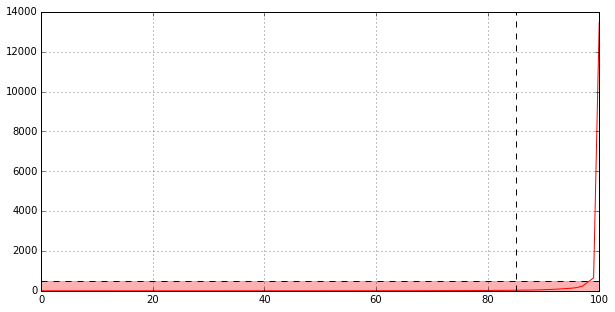

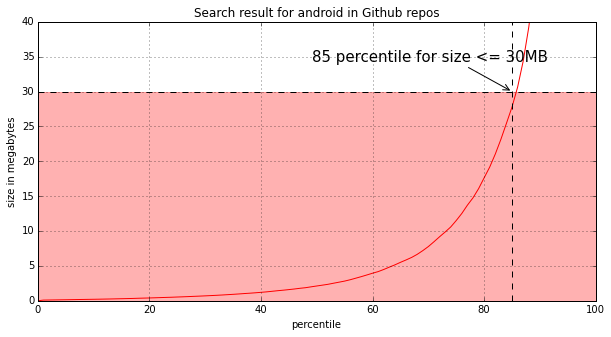

In [152]:
import json
import matplotlib.pyplot as plt
import numpy as np

# import data from json file
vals = json.load(open('output.json'))
sizes = [val['size'] for val in vals]
percentile_size = [[ii, np.percentile(sizes, ii)/1024] for ii in range(101)]
percentile_size = zip(*percentile_size)
percentile = percentile_size[0]
size = percentile_size[1]

# graph 1 for overview
fig = plt.figure(figsize=(10,5))
plt.plot(percentile, size, 'r')
plt.grid(True)

plt.axvline(x=85, color='k', ls='dashed')
plt.axhline(y=500, color='k', ls='dashed')
plt.axhspan(0,500, color='r', alpha=0.3)

# graph 2 for decision
fig = plt.figure(figsize=(10,5))
plt.plot(percentile, size, 'r')
plt.xlabel('percentile')
plt.ylabel('size in megabytes')
plt.title('Search result for android in Github repos')
plt.grid(True)

plt.axvline(x=85, color='k', ls='dashed')
plt.axhline(y=30, color='k', ls='dashed')
plt.axhspan(0,30, color='r', alpha=0.3)
plt.ylim([0, 40])
plt.annotate('85 percentile for size <= 30MB', xy=(85, 30),  xycoords='data',
            xytext=(-200, 30), textcoords='offset points', fontsize=15,
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc,angleA=0,armA=20,rad=20"),
            )

# Size of storage for storing repos for 85 percentile
sizes_85 = [size for size in sizes if size <= np.percentile(sizes, 85)]
print "Storage size:", sum(sizes_85)/1024**2, "GB"
print "Number of repos:", len(sizes_85), "out of", len(sizes)